<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="180" /></center>

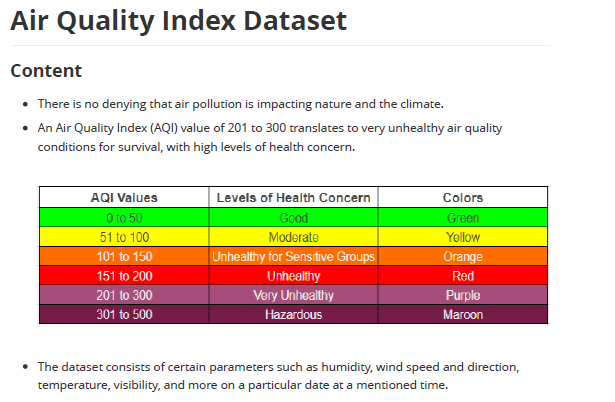

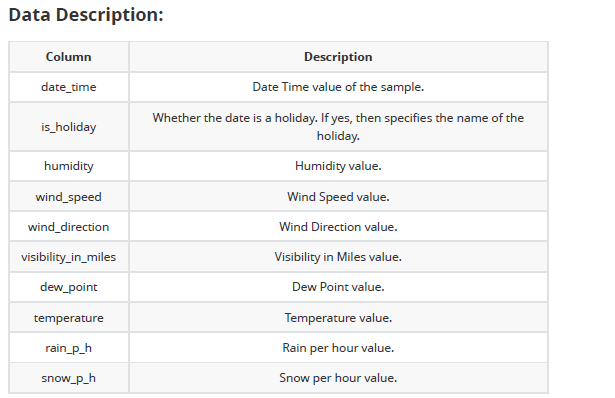

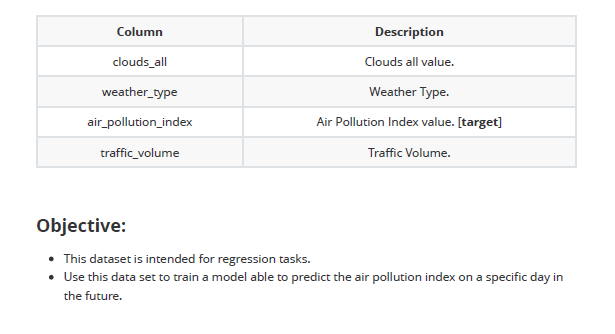

### Importing Packages and loading Data

In [2]:
pip install keras-tuner

     |████████████████████████████████| 71kB 5.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=1bdaf50e4a2a26c736e9e10cb6680defc63235642544e9005eb5859036d15630
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=c0131fe390d25495fae779d08979c5223b0e910737345842b40a97dc2a5b0dd4
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [3]:
import tensorflow as tf
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
import numpy as np
import pandas as pd
import kerastuner as kt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving air_quality.csv to air_quality.csv


In [5]:
import io
original_data = pd.read_csv(io.BytesIO(uploaded['air_quality.csv']))
original_data.head(5)

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


### Exploratory Data Anaysis

In [6]:
original_data.shape

(33750, 14)

In [7]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           33750 non-null  object 
 2   humidity             33750 non-null  int64  
 3   wind_speed           33750 non-null  int64  
 4   wind_direction       33750 non-null  int64  
 5   visibility_in_miles  33750 non-null  int64  
 6   dew_point            33750 non-null  int64  
 7   temperature          33750 non-null  float64
 8   rain_p_h             33750 non-null  float64
 9   snow_p_h             33750 non-null  float64
 10  clouds_all           33750 non-null  int64  
 11  weather_type         33750 non-null  object 
 12  air_pollution_index  33750 non-null  int64  
 13  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 3.6+ MB


In [8]:
# Finding NULL values counts

original_data.isnull().sum()

date_time              0
is_holiday             0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
air_pollution_index    0
traffic_volume         0
dtype: int64

In [9]:
# Uderstanding the statistical inference

original_data.describe()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,154.841422,3240.118163
std,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,83.735515,1991.487289
min,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,83.000000,1165.250000
50%,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,155.000000,3335.000000
75%,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,228.000000,4926.000000
max,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,299.000000,7280.000000


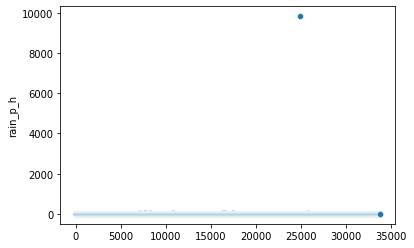

In [10]:
# scatter plot of rain_p_h feature
import seaborn as sns

sns.scatterplot(data=original_data['rain_p_h'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fa40ffbfb10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa40ffcab10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa40ffd0b50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa40ffd0610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa410f09690>,
  <matplotlib.lines.Line2D at 0x7fa40ffca5d0>]}

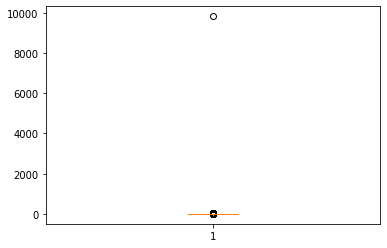

In [11]:
plt.boxplot(original_data['rain_p_h'])

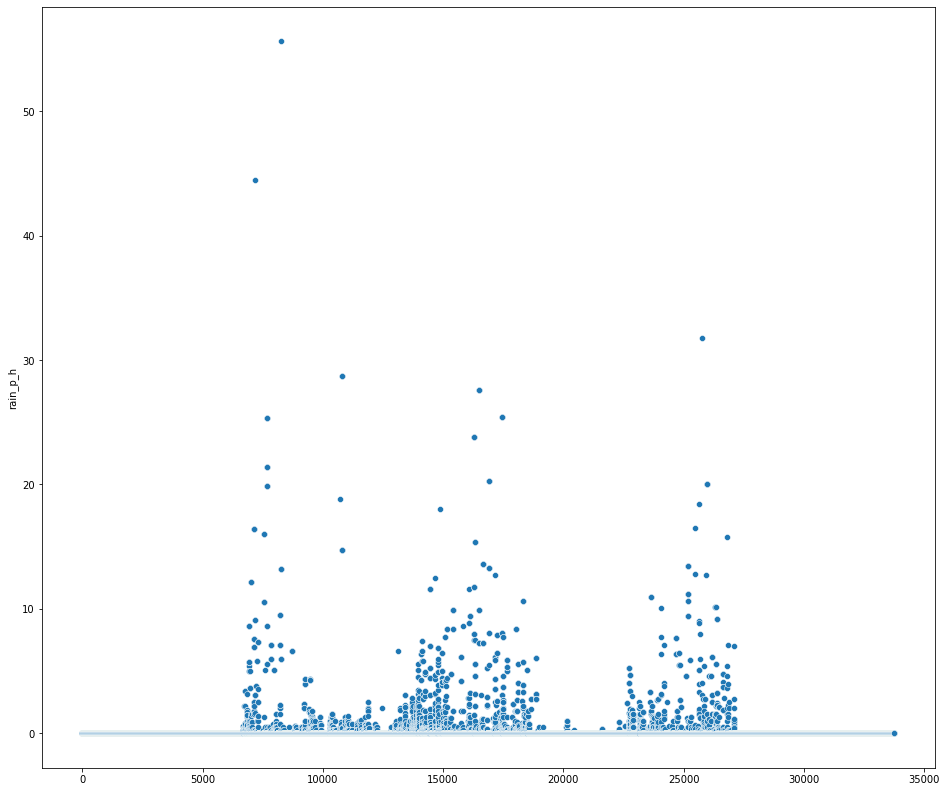

In [12]:
# As per above plot, There is an outier in rain_p_h with value of 9831, lets remove it and see the distribution further

original_data.drop(original_data[original_data['rain_p_h']>200.13].index, inplace=True)
fig_dims = (16, 14)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(data=original_data['rain_p_h'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fa40fdfddd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa40fe06e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa40fe0de90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa40fe0d950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa40fe063d0>,
  <matplotlib.lines.Line2D at 0x7fa40fe06910>]}

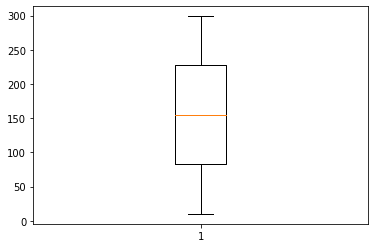

In [14]:
plt.boxplot(original_data['air_pollution_index'])

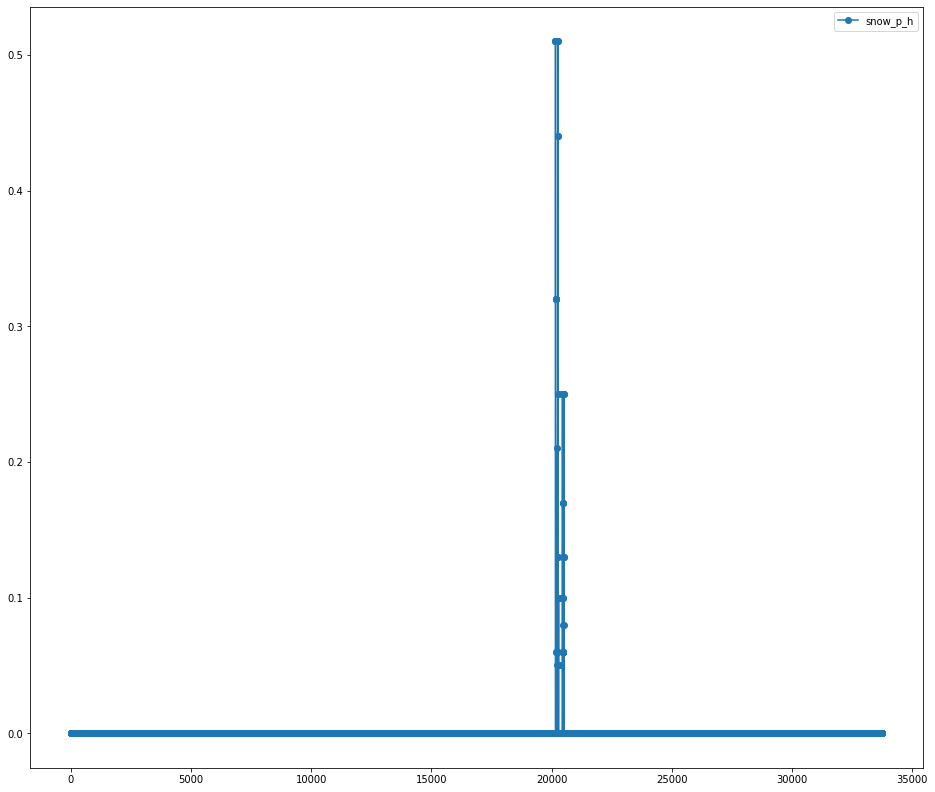

In [15]:
fig_dims = (16, 14)
fig, ax = plt.subplots(figsize=fig_dims)

original_data.plot( y='snow_p_h', use_index=True, ax=ax, marker='o')

{'boxes': [<matplotlib.lines.Line2D at 0x7fa40fcec950>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa40fcf0990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa40fcf79d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa40fcf7490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa40fceced0>,
  <matplotlib.lines.Line2D at 0x7fa40fcf0450>]}

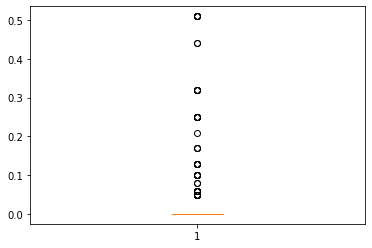

In [16]:
plt.boxplot(original_data['snow_p_h'])

In [17]:
#  Box plot shows Mean is nearly 0, few outliers

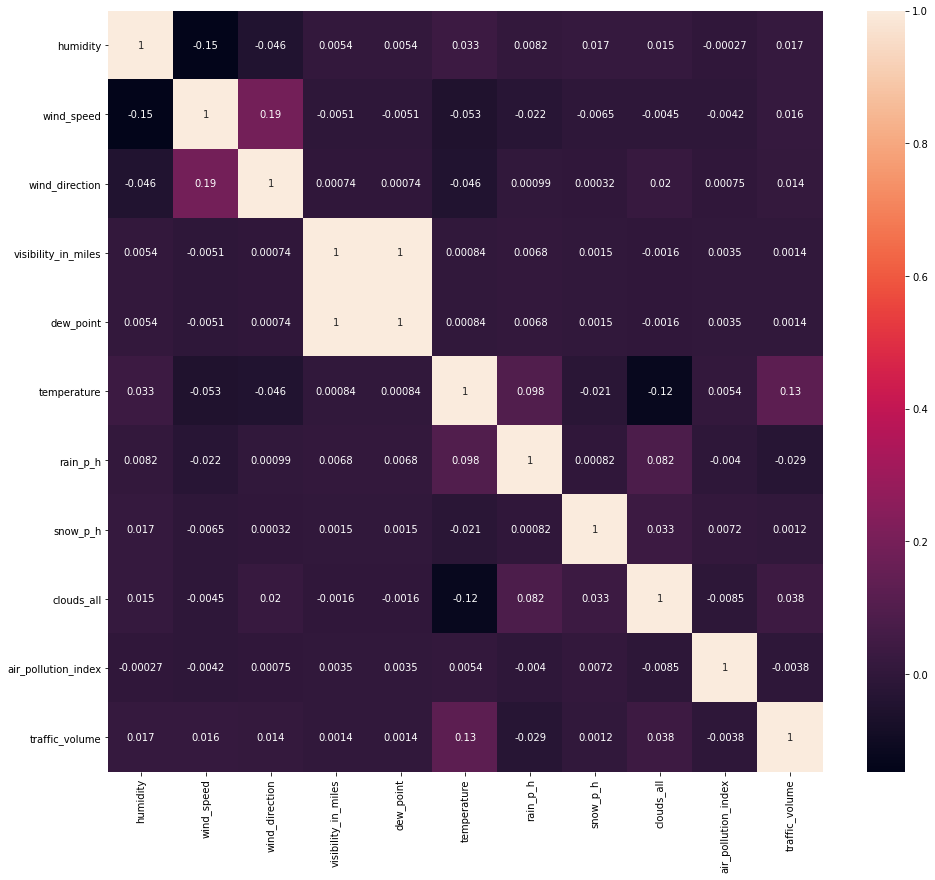

In [18]:
corr = original_data.corr()

fig_dims = (16, 14)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(corr, annot = True,ax= ax )

In [ ]:
# Visibility_in_miles & dew_point are redundant columns as there is 100% correlation between these 2 features. so dropping "Visibility_in_miles"

In [102]:
original_data.drop(labels= ['visibility_in_miles'], axis=1, inplace=True)

In [19]:
original_data.is_holiday.value_counts()

None                         33706
Thanksgiving Day                 5
Christmas Day                    5
New Years Day                    5
Veterans Day                     4
Labor Day                        4
Washingtons Birthday             4
Columbus Day                     4
Independence Day                 3
State Fair                       3
Memorial Day                     3
Martin Luther King Jr Day        3
Name: is_holiday, dtype: int64

In [20]:
original_data.weather_type.value_counts()

Clouds          11213
Clear            9233
Mist             4047
Rain             3939
Snow             2070
Drizzle          1204
Haze              902
Fog               567
Thunderstorm      553
Smoke              17
Squall              4
Name: weather_type, dtype: int64

In [21]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], drop_first=False)
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [103]:
encode_df = encode_and_bind(original_data, 'is_holiday')

In [104]:
encode_df = encode_and_bind(encode_df, 'weather_type')

In [105]:
encode_df.drop(labels=['is_holiday', 'weather_type'], axis=1, inplace=True)

In [106]:
encode_df.head()

,date_time,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume,is_holiday_Christmas Day,is_holiday_Columbus Day,is_holiday_Independence Day,is_holiday_Labor Day,is_holiday_Martin Luther King Jr Day,is_holiday_Memorial Day,is_holiday_New Years Day,is_holiday_None,is_holiday_State Fair,is_holiday_Thanksgiving Day,is_holiday_Veterans Day,is_holiday_Washingtons Birthday,weather_type_Clear,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm
0,2012-10-02 09:00:00,89,2,329,1,288.28,0.0,0.0,40,121,5545,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2012-10-02 10:00:00,67,3,330,1,289.36,0.0,0.0,75,178,4516,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2012-10-02 11:00:00,66,3,329,2,289.58,0.0,0.0,90,113,4767,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2012-10-02 12:00:00,66,3,329,5,290.13,0.0,0.0,90,20,5026,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2012-10-02 13:00:00,65,3,329,7,291.14,0.0,0.0,75,281,4918,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [107]:
encode_df['date_time'] = pd.to_datetime(encode_df['date_time'])

In [108]:
encode_df['date_time_year']= encode_df['date_time'].dt.year

In [109]:
encode_df['date_time_month']= encode_df['date_time'].dt.month

In [110]:
encode_df['date_time_day']= encode_df['date_time'].dt.day

In [111]:
encode_df['date_time_hour']= encode_df['date_time'].dt.hour

In [112]:
encode_df.drop(labels=['date_time'], axis=1, inplace=True)

In [32]:
encode_df.date_time_year.value_counts()

2016    9305
2013    8573
2014    4839
2015    4373
2017    4100
2012    2559
Name: date_time_year, dtype: int64

In [113]:
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33749 entries, 0 to 33749
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   humidity                              33749 non-null  int64  
 1   wind_speed                            33749 non-null  int64  
 2   wind_direction                        33749 non-null  int64  
 3   dew_point                             33749 non-null  int64  
 4   temperature                           33749 non-null  float64
 5   rain_p_h                              33749 non-null  float64
 6   snow_p_h                              33749 non-null  float64
 7   clouds_all                            33749 non-null  int64  
 8   air_pollution_index                   33749 non-null  int64  
 9   traffic_volume                        33749 non-null  int64  
 10  is_holiday_Christmas Day              33749 non-null  uint8  
 11  is_holiday_Colu

In [114]:
encode_df.head()

,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume,is_holiday_Christmas Day,is_holiday_Columbus Day,is_holiday_Independence Day,is_holiday_Labor Day,is_holiday_Martin Luther King Jr Day,is_holiday_Memorial Day,is_holiday_New Years Day,is_holiday_None,is_holiday_State Fair,is_holiday_Thanksgiving Day,is_holiday_Veterans Day,is_holiday_Washingtons Birthday,weather_type_Clear,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm,date_time_year,date_time_month,date_time_day,date_time_hour
0,89,2,329,1,288.28,0.0,0.0,40,121,5545,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2012,10,2,9
1,67,3,330,1,289.36,0.0,0.0,75,178,4516,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2012,10,2,10
2,66,3,329,2,289.58,0.0,0.0,90,113,4767,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2012,10,2,11
3,66,3,329,5,290.13,0.0,0.0,90,20,5026,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2012,10,2,12
4,65,3,329,7,291.14,0.0,0.0,75,281,4918,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2012,10,2,13


### Train Test Split

In [115]:
y=encode_df['air_pollution_index']

In [116]:
X=encode_df.drop(labels=['air_pollution_index'], axis=1)

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [38]:
y_train.shape

(25311,)

In [118]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

In [119]:
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [41]:
partial_X_train.shape[1]

37

### Building model with out scaling & shallow neural network

In [120]:
def build_fn():
    # Build your model here.
    model = Sequential()
    model.add(Dense(250,input_dim=partial_X_train.shape[1], activation='relu' ))
    model.add(Dense(100, activation='relu' ))
    model.add(Dense(1, activation='linear'))
    return model

In [43]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [121]:
model = build_fn()

In [122]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 250)               9250      
_________________________________________________________________
dense_18 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 34,451
Trainable params: 34,451
Non-trainable params: 0
_________________________________________________________________


In [123]:
def compile_fn(model):
    # Compile your model here.   
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error']) 

    return model

In [124]:
model = compile_fn(model)

In [125]:
def fit_fn(model):
    history = model.fit(x=partial_X_train, y=partial_y_train, batch_size=256, epochs=800, validation_data=(X_val,y_val), callbacks=[es])

    return model, history

In [126]:
model, history = fit_fn(model)

Epoch 1/800
95/95 [==============================] - 1s 5ms/step - loss: 15152.5645 - mean_squared_error: 15152.5645 - val_loss: 6852.8320 - val_mean_squared_error: 6852.8320
Epoch 2/800
95/95 [==============================] - 0s 3ms/step - loss: 7101.9843 - mean_squared_error: 7101.9843 - val_loss: 6902.8169 - val_mean_squared_error: 6902.8169
Epoch 3/800
95/95 [==============================] - 0s 3ms/step - loss: 7126.3288 - mean_squared_error: 7126.3288 - val_loss: 6896.5820 - val_mean_squared_error: 6896.5820
Epoch 4/800
95/95 [==============================] - 0s 3ms/step - loss: 7153.4174 - mean_squared_error: 7153.4174 - val_loss: 7170.7939 - val_mean_squared_error: 7170.7939
Epoch 5/800
95/95 [==============================] - 0s 3ms/step - loss: 7155.7693 - mean_squared_error: 7155.7693 - val_loss: 7387.2021 - val_mean_squared_error: 7387.2021
Epoch 6/800
95/95 [==============================] - 0s 3ms/step - loss: 7230.8781 - mean_squared_error: 7230.8781 - val_loss: 6995.7

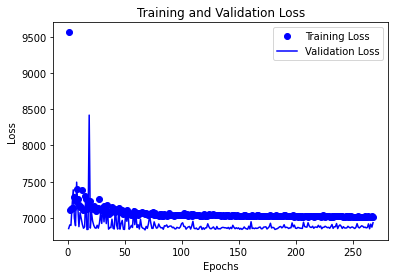

In [127]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
### Both Training and Validation losses are noisy, seems there is no enough learning by the network. 

### Trying with scaled features on the same network

In [128]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
X_val_scaled = X_train_scaled[:1000]
partial_X_train_scaled = X_train_scaled[1000:]

In [130]:
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [55]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [131]:
def fit_fn_scaled(model):
    history = model.fit(x=partial_X_train_scaled, y=partial_y_train, batch_size=1000, epochs=700, validation_data=(X_val_scaled,y_val), callbacks=[es, mc])

    return model, history

In [132]:
model, history = fit_fn_scaled(model)

Epoch 1/700
25/25 [==============================] - 0s 12ms/step - loss: 21825.1113 - mean_squared_error: 21825.1113 - val_loss: 16680.1855 - val_mean_squared_error: 16680.1855

Epoch 00001: val_loss did not improve from 6856.88330
Epoch 2/700
25/25 [==============================] - 0s 8ms/step - loss: 9044.1787 - mean_squared_error: 9044.1787 - val_loss: 8915.9316 - val_mean_squared_error: 8915.9316

Epoch 00002: val_loss did not improve from 6856.88330
Epoch 3/700
25/25 [==============================] - 0s 8ms/step - loss: 7546.6870 - mean_squared_error: 7546.6870 - val_loss: 7475.2539 - val_mean_squared_error: 7475.2539

Epoch 00003: val_loss did not improve from 6856.88330
Epoch 4/700
25/25 [==============================] - 0s 8ms/step - loss: 7197.7490 - mean_squared_error: 7197.7490 - val_loss: 7093.7271 - val_mean_squared_error: 7093.7271

Epoch 00004: val_loss did not improve from 6856.88330
Epoch 5/700
25/25 [==============================] - 0s 8ms/step - loss: 7113.7153 

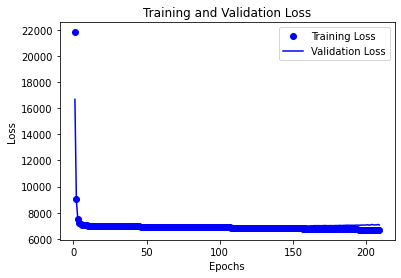

In [133]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
# Validation loss is growing after roughly 75 epochs, may be thats point of overfitting. However, training loss is less with scaled date when compared to non scaled features.

### Trying with more dense network by adding additional hidden layers, drop outs and model check point as well.

In [134]:
def build_fn2():
    # Build your model here.
    model = Sequential()
    model.add(Dense(500,input_dim=partial_X_train_scaled.shape[1], activation='relu', kernel_regularizer='l1' ))
    model.add(Dropout(0.5))
    model.add(Dense(500, activation='relu', kernel_regularizer='l2' ))
    model.add(Dropout(0.4))
    model.add(Dense(500, activation='relu', kernel_regularizer='l2' ))
    model.add(Dropout(0.3))
    model.add(Dense(500, activation='relu', kernel_regularizer='l1' ))
    model.add(Dropout(0.2))
    model.add(Dense(500, activation='relu', kernel_regularizer='l1' ))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='linear'))
    return model

In [135]:
model = build_fn2()

In [136]:
model = compile_fn(model)

In [63]:
model, history = fit_fn_scaled(model)

Epoch 1/700
25/25 [==============================] - 3s 113ms/step - loss: 22740.0822 - mean_squared_error: 22527.3423 - val_loss: 8861.5225 - val_mean_squared_error: 8653.2861

Epoch 00001: val_loss did not improve from 6856.88330
Epoch 2/700
25/25 [==============================] - 3s 104ms/step - loss: 8799.2396 - mean_squared_error: 8593.2790 - val_loss: 7483.7383 - val_mean_squared_error: 7284.8623

Epoch 00002: val_loss did not improve from 6856.88330
Epoch 3/700
25/25 [==============================] - 3s 107ms/step - loss: 8184.5643 - mean_squared_error: 7988.0631 - val_loss: 7179.4893 - val_mean_squared_error: 6989.8535

Epoch 00003: val_loss did not improve from 6856.88330
Epoch 4/700
25/25 [==============================] - 3s 107ms/step - loss: 7878.0478 - mean_squared_error: 7690.4747 - val_loss: 7081.5254 - val_mean_squared_error: 6899.8105

Epoch 00004: val_loss did not improve from 6856.88330
Epoch 5/700
25/25 [==============================] - 3s 106ms/step - loss: 786

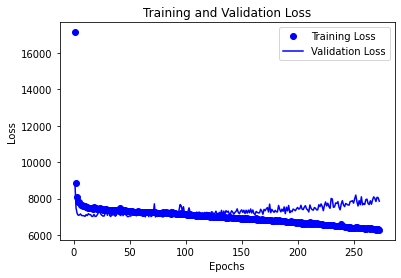

In [64]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [65]:
# Validation loss is growing after roughly 125 epochs, and training loss continue to decrease. Reflecting thats point of overfitting. 

### deleting Date fields and trying with medium level network

In [137]:
encode_df2 = encode_df.drop(labels=['date_time_year', 'date_time_month', 'date_time_day', 'date_time_hour'], axis=1)

In [70]:
original_data.snow_p_h.value_counts()

0.00    33686
0.05       14
0.06       12
0.10        6
0.13        6
0.51        6
0.25        6
0.32        5
0.17        3
0.08        2
0.44        2
0.21        1
Name: snow_p_h, dtype: int64

In [140]:
encode_df2 = original_data.drop(labels=['date_time', 'is_holiday', 'snow_p_h'], axis=1)

In [141]:
encode_df2.describe()

,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,clouds_all,air_pollution_index,traffic_volume
count,33749.000000,33749.000000,33749.000000,33749.000000,33749.000000,33749.000000,33749.000000,33749.000000,33749.000000
mean,71.210140,3.378174,199.470651,4.989866,280.068934,0.157446,50.458058,154.841180,3240.050164
std,16.851214,2.055820,99.842323,2.569968,13.414918,1.158517,38.872080,83.736743,1991.477613
min,13.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,60.000000,2.000000,130.000000,3.000000,271.720000,0.000000,1.000000,83.000000,1165.000000
50%,72.000000,3.000000,200.000000,5.000000,280.150000,0.000000,64.000000,155.000000,3335.000000
75%,85.000000,5.000000,290.000000,7.000000,290.620000,0.000000,90.000000,228.000000,4926.000000
max,100.000000,16.000000,360.000000,9.000000,308.240000,55.630000,100.000000,299.000000,7280.000000


In [142]:
encode_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33749 entries, 0 to 33749
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   humidity             33749 non-null  int64  
 1   wind_speed           33749 non-null  int64  
 2   wind_direction       33749 non-null  int64  
 3   dew_point            33749 non-null  int64  
 4   temperature          33749 non-null  float64
 5   rain_p_h             33749 non-null  float64
 6   clouds_all           33749 non-null  int64  
 7   weather_type         33749 non-null  object 
 8   air_pollution_index  33749 non-null  int64  
 9   traffic_volume       33749 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 2.8+ MB


In [143]:
encode_df2 = encode_and_bind(encode_df2, 'weather_type')

In [144]:
encode_df2.drop(labels=['weather_type'], axis=1, inplace=True)

In [145]:
encode_df2.head()

,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,clouds_all,air_pollution_index,traffic_volume,weather_type_Clear,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm
0,89,2,329,1,288.28,0.0,40,121,5545,0,1,0,0,0,0,0,0,0,0,0
1,67,3,330,1,289.36,0.0,75,178,4516,0,1,0,0,0,0,0,0,0,0,0
2,66,3,329,2,289.58,0.0,90,113,4767,0,1,0,0,0,0,0,0,0,0,0
3,66,3,329,5,290.13,0.0,90,20,5026,0,1,0,0,0,0,0,0,0,0,0
4,65,3,329,7,291.14,0.0,75,281,4918,0,1,0,0,0,0,0,0,0,0,0


In [146]:
X2=encode_df2.drop(labels=['air_pollution_index'], axis=1)

In [147]:
y2=encode_df2['air_pollution_index']

In [148]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=12)

In [149]:
X2_train.shape

(26999, 19)

In [150]:
scaler2 = StandardScaler()
scaler2.fit(X2_train)

X2_train_scaled = scaler2.transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

In [151]:
X2_val_scaled = X2_train_scaled[:1000]
partial_X2_train_scaled = X2_train_scaled[1000:]

In [152]:
y2_val = y2_train[:1000]
partial_y2_train = y2_train[1000:]

In [154]:
def build_fn2_scaled():
    # Build your model here.
    model = Sequential()
    model.add(Dense(500,input_dim=partial_X2_train_scaled.shape[1], activation='relu', kernel_regularizer='l1' ))
    model.add(Dropout(0.5))
    model.add(Dense(500, activation='relu', kernel_regularizer='l2' ))
    model.add(Dropout(0.4))
    model.add(Dense(500, activation='relu', kernel_regularizer='l2' ))
    model.add(Dropout(0.3))
    model.add(Dense(500, activation='relu', kernel_regularizer='l1' ))
    model.add(Dropout(0.2))
    model.add(Dense(500, activation='relu', kernel_regularizer='l1' ))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='linear'))
    return model

In [155]:
model = build_fn2_scaled()

In [156]:
Adam = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    
)

In [157]:
def compile_fn2(model):
    # Compile your model here.   
    model.compile(optimizer=Adam , loss='mse', metrics=['mse']) 
    return model

In [158]:
model = compile_fn2(model)

In [159]:
es2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=250)

In [160]:
mc2 = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [161]:
def fit_fn2(model):
    history = model.fit(x=partial_X2_train_scaled, y=partial_y2_train, epochs=2000, batch_size=4000, validation_data=(X2_val_scaled,y2_val), verbose=0, callbacks=[es2, mc2])
    return model, history

In [162]:
model, history = fit_fn2(model)


Epoch 00001: val_loss improved from inf to 29690.05078, saving model to best_model.h5

Epoch 00002: val_loss improved from 29690.05078 to 11294.77539, saving model to best_model.h5

Epoch 00003: val_loss improved from 11294.77539 to 9191.37891, saving model to best_model.h5

Epoch 00004: val_loss improved from 9191.37891 to 8228.12598, saving model to best_model.h5

Epoch 00005: val_loss improved from 8228.12598 to 7766.45410, saving model to best_model.h5

Epoch 00006: val_loss did not improve from 7766.45410

Epoch 00007: val_loss did not improve from 7766.45410

Epoch 00008: val_loss did not improve from 7766.45410

Epoch 00009: val_loss did not improve from 7766.45410

Epoch 00010: val_loss did not improve from 7766.45410

Epoch 00011: val_loss did not improve from 7766.45410

Epoch 00012: val_loss did not improve from 7766.45410

Epoch 00013: val_loss did not improve from 7766.45410

Epoch 00014: val_loss did not improve from 7766.45410

Epoch 00015: val_loss did not improve from

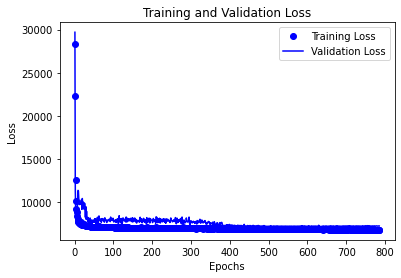

In [163]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [95]:
# As the training error is still decreasing and lot of noise added. Seems there is no proper training happening so we will increase neurons and add drop outs as well.
# remaining all were left as is

### Evaluating the model

In [ ]:
# load the saved model
saved_model = load_model('best_model.h5')

Train: 7016.975, Test: 7080.464


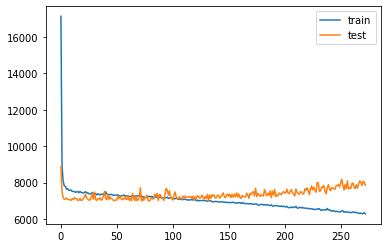

In [67]:
# evaluate the model
_, train_loss = saved_model.evaluate(partial_X_train_scaled, partial_y_train , verbose=0)
_, test_loss = saved_model.evaluate(X_test_scaled , y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_loss, test_loss))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()